In [1]:
import pandas as pd
import os
import cv2
import pickle
import numpy as np
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical

## Import & Parse XML data
Much of the code for preprocessing is from Farhan Sadaf. Located [here](https://github.com/FarhanSadaf/face-mask-detection/blob/master/1_data-preprocessing.ipynb).

In [2]:
BASE_DIR = os.getcwd()
image_dir = os.path.join(BASE_DIR, 'data', 'images')
annot_dir = os.path.join(BASE_DIR, 'data', 'annotations')

In [4]:
label2category = {'without_mask': 0, 'with_mask': 1, 'mask_weared_incorrect': 2}
category2label = {v: k for k, v in label2category.items()}
data_list = []

for root, dirs, files in os.walk(annot_dir):
    for file in files:
        tree = et.parse(os.path.join(root, file))
        data = {'path': None, 'objects': []}
        data['path'] = os.path.join(image_dir, tree.find('filename').text)
        for obj in tree.findall('object'):
            label = label2category[obj.find('name').text]
            # top left co-ordinates
            xmin = int(obj.find('bndbox/xmin').text)
            ymin = int(obj.find('bndbox/ymin').text)
            # bottom right co-ordinates
            xmax = int(obj.find('bndbox/xmax').text)
            ymax = int(obj.find('bndbox/ymax').text)
            data['objects'].append([label, xmin, ymin, xmax, ymax])
        data_list.append(data)

print('Total images :', len(data_list))

Total images : 853


## Draw Bounding Boxes

In [21]:
def show_image(data, index):
    #Read image according to index
    img = cv2.imread(data[index]['path'])

    #Draw bounding box
    for (category, xmin, ymin, xmax, ymax) in data[index]['objects']:
        # Change box color based on label & draw
        if category == 0:
            cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 0, 255), 1)
        elif category == 1:
            cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 1)
        else:
            cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 255), 1)

        #Add label text    
        cv2.putText(img, str(category), (xmin+2, ymin-3), cv2.FONT_HERSHEY_SIMPLEX, 0.38, (255,255,255), 2)

    # Show image
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

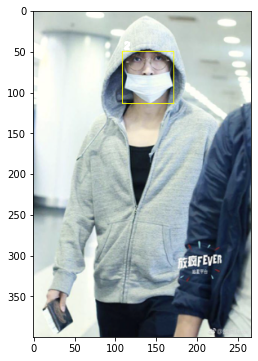

In [23]:
show_image(data_list, 234)

## Train Model

In [ ]:
#Train model

In [ ]:
#Create more w/out mask & incorrect mask data to address class imbalance

In [ ]:
#Add ability to detect faces without bounding boxes